IMPORTING DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

c:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


* Reviewing and setting up the class labels 
* Fixing the image size for pre-processing

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea' , 'forest']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

print(class_names_label)

IMAGE_SIZE = (150,150)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


  OS Functionality

* Defining a function to load the data from desired directory.
* Pre-Processing the images with the help of cv2 library and finally appending the corresponind 
  image and its labels in the form of numpy arrays.

In [3]:
# Loading the data
def load_data():
    DIRECTORY = r"E:\image_models"
    CATEGORY = ["seg_train" , "seg_test"]

    output = []

    for category in CATEGORY:
        path = os.path.join(DIRECTORY,category)
        print(path)
        images = []
        labels = []

        print("Loading {}".format(category))

        for folder in os.listdir(path):
            label = class_names_label[folder]

            #iterate through each image in our folder
            for file in os.listdir(os.path.join(path , folder)):

                #get the path name of the image
                img_path = os.path.join(os.path.join(path,folder), file)

                #open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images,dtype='float32')
        labels = np.array(labels , dtype= 'int32')

        output.append((images, labels))
    
    return output


Loading the raw data

In [4]:
(train_images , train_labels), (test_images , test_labels) = load_data()

E:\image_models\seg_train
Loading seg_train
E:\image_models\seg_test
Loading seg_test


Using the shuffle funtion to randomly sparse the data arrays 

In [5]:
train_images , train_labels = shuffle(train_images, train_labels, random_state=25)

Reviewing some sample images 

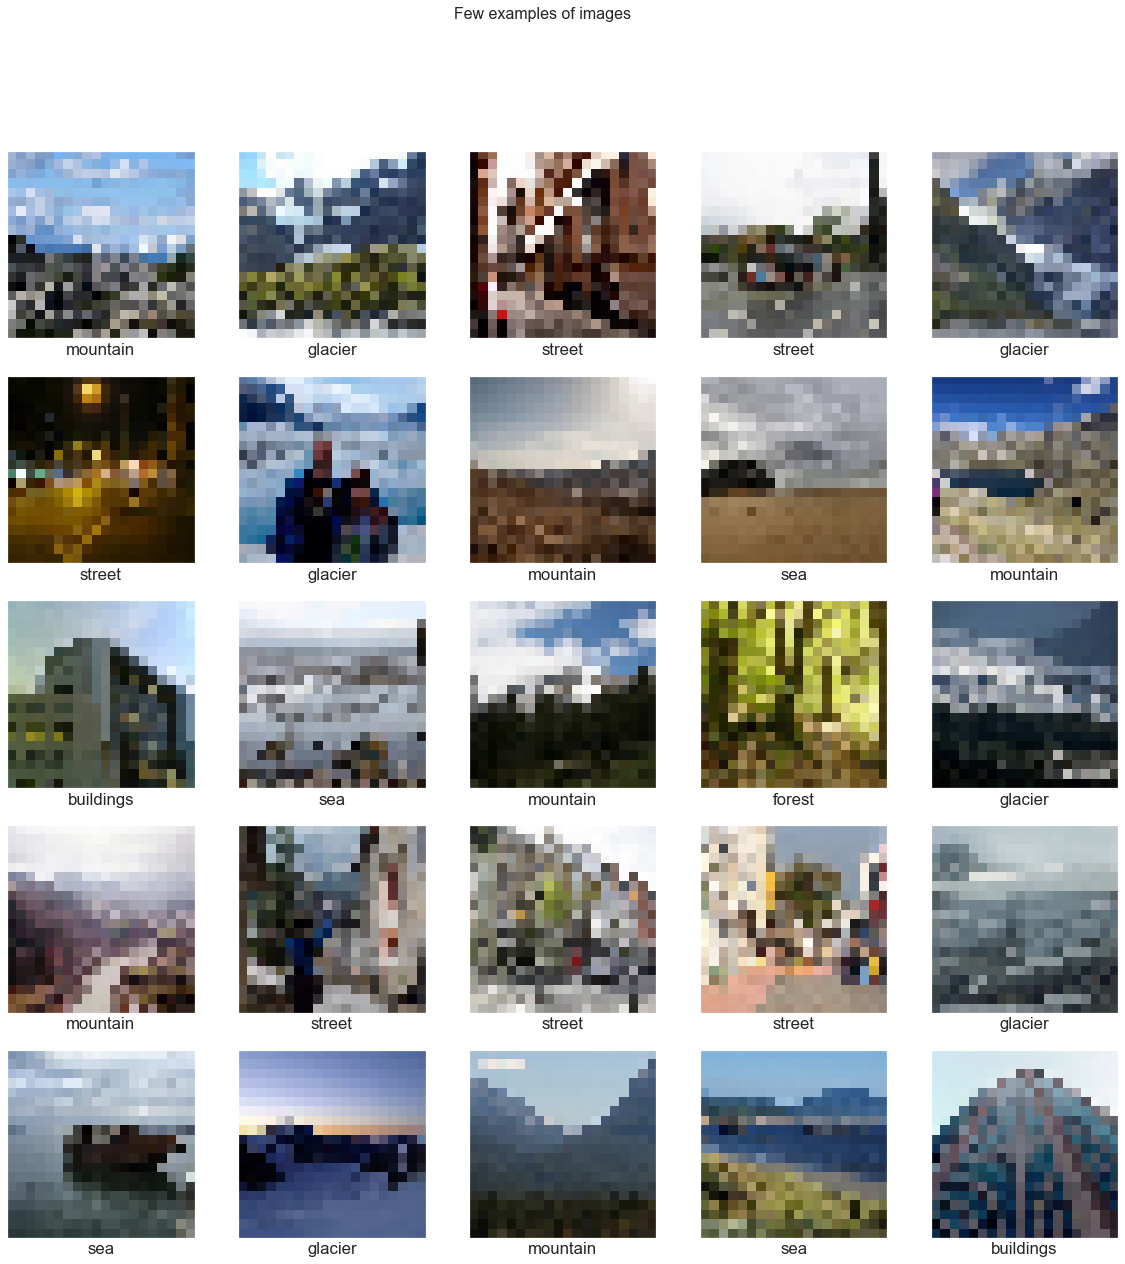

In [6]:
def display_examples(class_names, images, labels):

    figsize = (20,20)
    fig = plt.figure(figsize=figsize)
    fig.suptitle("Few examples of images ", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        image = cv2.resize(images[i], figsize)
        plt.imshow(image.astype(np.uint8))
        plt.xlabel(class_names[labels[i]])
    plt.show()


display_examples(class_names, train_images, train_labels)

Preparing the Sequential neural model and setting up different layers and their parameters 

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape =(150,150,3) ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3) , activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)
])

Defining the loss and optimizer parameter of model

In [8]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_images , train_labels , batch_size=128 , epochs=4, validation_split=0.2)

Epoch 1/4
88/88 [==============================] - ETA: 0s - loss: 56.3880 - accuracy: 0.3026

Plotting training and validation curves of accuracy and loss

In [ ]:
def plot_accuracy_loss(history):

    fig = plt.figure(figsize=(10,5))

    #plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

    #plot the function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

Results 

In [ ]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions , axis =1)

print(classification_report(test_labels, pred_labels))